# Customer Churn prediction using ANN

## 1 | Importing the libraries

In [143]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## 2 | Importing the Data

In [144]:
dataset = pd.read_csv('customer-data.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Just by taking a look at the dataset, we can safely assume that the columns: 'RowNumber', 'CustomerId' and 'Surname', will have no impact on our model. So, we can safely remove them.

In [145]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'] , axis=1, inplace=True)

In [147]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


No missing values. No imputation required.

## 3 | Data Analysis

### 3.1 | Exited people count

In [149]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

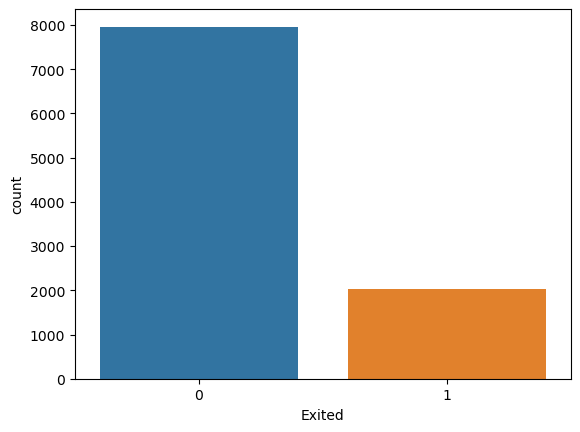

In [150]:
sns.countplot(x = 'Exited', data = dataset)

There appears to be a imbalance in the value counts. But we will not consider it as of now beacause the dataset we have is limited.

### 3.2 | Geography distribution

In [151]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

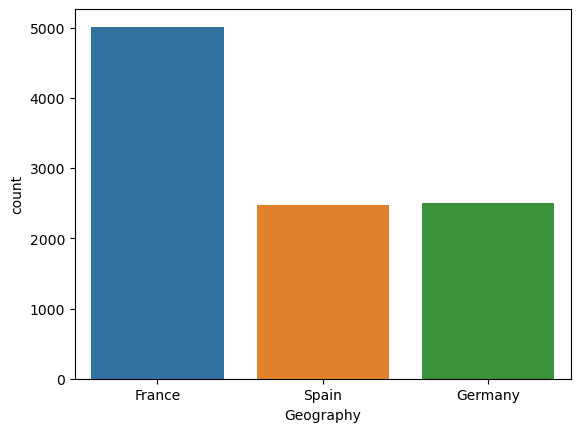

In [153]:
sns.countplot(x = 'Geography', data = dataset)

There appears to be a lot of french people's data.

Germany    0.399607
France     0.397644
Spain      0.202749
Name: Geography, dtype: float64


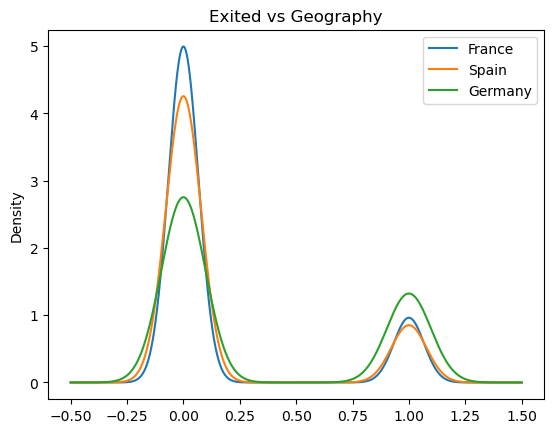

In [168]:
print(dataset.Geography[dataset.Exited == True].value_counts(normalize=True))
for i in ['France', 'Spain', 'Germany']:
    dataset.Exited[dataset.Geography == i].plot(kind='kde')
plt.title("Exited vs Geography")
plt.legend(['France', 'Spain', 'Germany'])
plt.show()

Since the distribution of people exitng seems to be normally distributed, there appears to be no trend.

### 3.3 | Gender distribution

In [119]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

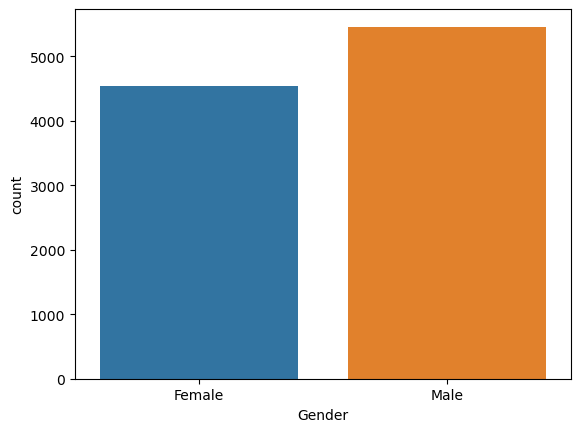

In [154]:
sns.countplot(x = 'Gender', data = dataset)

Gender appears to be randomly distributed.

Female    0.559156
Male      0.440844
Name: Gender, dtype: float64


Text(0.5, 1.0, 'Female vs Male Exited')

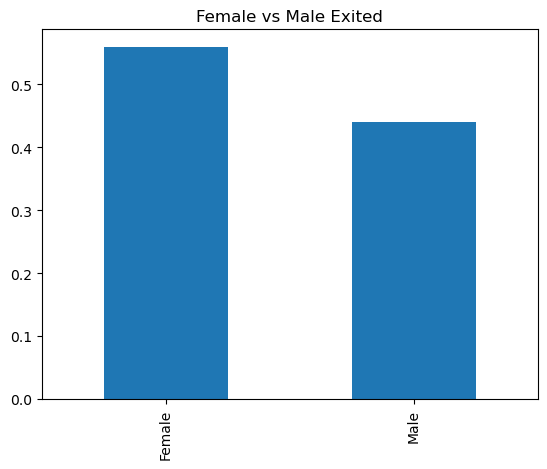

In [164]:
print(dataset.Gender[dataset.Exited == True].value_counts(normalize=True))
dataset.Gender[dataset.Exited == True].value_counts(normalize=True).plot(kind='bar')
plt.title('Female vs Male Exited')

### 3.4 | Age distribution

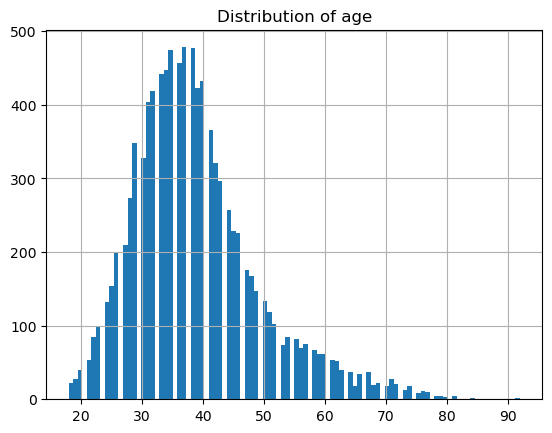

In [155]:
dataset['Age'].hist(bins=100)
plt.title('Distribution of age')
plt.show()

Age seems to be normaly distributed.

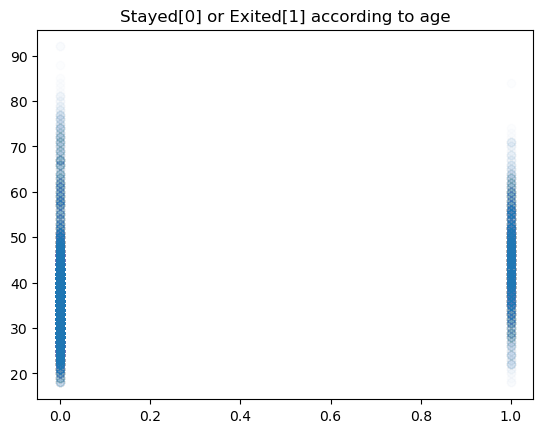

In [162]:
plt.scatter(dataset.Exited, dataset.Age, alpha=0.01)
plt.title('Stayed[0] or Exited[1] according to age')
plt.show()

More young people appears to stay, while middle aged people appears to be exiting more.

### Encoding categorical data

In [121]:
dataset = pd.get_dummies(data = dataset, columns = ['Geography', 'Gender'], drop_first = True)

In [123]:
X = dataset.drop(columns=['Exited']).values
y = dataset['Exited'].values

Label Encoding the "Gender" column

In [124]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#X[:, 2] = le.fit_transform(X[:, 2])

In [125]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#X = np.array(ct.fit_transform(X))
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

In [126]:
print(X)

[[619.  42.   2. ...   0.   0.   0.]
 [608.  41.   1. ...   0.   1.   0.]
 [502.  42.   8. ...   0.   0.   0.]
 ...
 [709.  36.   7. ...   0.   0.   0.]
 [772.  42.   3. ...   1.   0.   1.]
 [792.  28.   4. ...   0.   0.   0.]]


### Splitting the dataset into the Training set and Test set

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [129]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [130]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [131]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [132]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [133]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [134]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 412us/step - loss: 0.6922 - accuracy: 0.5685
Epoch 2/100
250/250 [==============================] - 0s 593us/step - loss: 0.5123 - accuracy: 0.7894
Epoch 3/100
250/250 [==============================] - 0s 374us/step - loss: 0.4582 - accuracy: 0.8095
Epoch 4/100
  1/250 [..............................] - ETA: 0s - loss: 0.3821 - accuracy: 0.9062

250/250 [==============================] - 0s 364us/step - loss: 0.4350 - accuracy: 0.8145
Epoch 5/100
250/250 [==============================] - 0s 334us/step - loss: 0.4226 - accuracy: 0.8213
Epoch 6/100
250/250 [==============================] - 0s 329us/step - loss: 0.4110 - accuracy: 0.8259
Epoch 7/100
250/250 [==============================] - 0s 326us/step - loss: 0.3948 - accuracy: 0.8359
Epoch 8/100
250/250 [==============================] - 0s 324us/step - loss: 0.3784 - accuracy: 0.8445
Epoch 9/100
250/250 [==============================] - 0s 330us/step - loss: 0.3660 - accuracy: 0.8481
Epoch 10/100
250/250 [==============================] - 0s 418us/step - loss: 0.3577 - accuracy: 0.8503
Epoch 11/100
250/250 [==============================] - 0s 331us/step - loss: 0.3523 - accuracy: 0.8537
Epoch 12/100
250/250 [==============================] - 0s 321us/step - loss: 0.3488 - accuracy: 0.8543
Epoch 13/100
250/250 [==============================] - 0s 322us/step - loss: 0.34

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [135]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 799us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [136]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1512   83]
 [ 200  205]]


0.8585